In [24]:
import requests
import json
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans
import random
from collections import Counter

C:\Users\humph\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [13]:
url = 'http://odapapi.defrilab.com/api/Odap/recentMessages'

In [33]:
response = requests.get(url)
str_data = response.json()
print(str_data)

[{'uniqueDeviceId': 'Device4', 'lat': -0.9, 'long': 36.5, 'alt': 1740, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 4}, {'uniqueDeviceId': 'Device3', 'lat': 0.47, 'long': 46.7, 'alt': 1640, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 3}, {'uniqueDeviceId': 'Device2', 'lat': -0.87, 'long': 36.7, 'alt': 1640, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 2}, {'uniqueDeviceId': 'Device1', 'lat': -0.45, 'long': 37, 'alt': 1500, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 1}]


In [34]:
loc_compact  = []
for loc in str_data:
    print(loc) 
    loc_compact.append([loc['lat'],loc['long']])
    print('\n')

{'uniqueDeviceId': 'Device4', 'lat': -0.9, 'long': 36.5, 'alt': 1740, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 4}


{'uniqueDeviceId': 'Device3', 'lat': 0.47, 'long': 46.7, 'alt': 1640, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 3}


{'uniqueDeviceId': 'Device2', 'lat': -0.87, 'long': 36.7, 'alt': 1640, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 2}


{'uniqueDeviceId': 'Device1', 'lat': -0.45, 'long': 37, 'alt': 1500, 'accuracyGPS': 900, 'directionEastWest': 'S', 'directionNorthSouth': 'E', 'accuracy': 20, 'accX': 0, 'accY': 0, 'accZ': 0, 'rssi': 0, 'id': 1}




In [35]:
loc_compact

[[-0.9, 36.5], [0.47, 46.7], [-0.87, 36.7], [-0.45, 37]]

In [39]:
loc_compact = np.array(loc_compact)

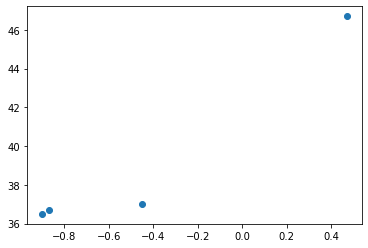

In [40]:
#make our own data using the make_blob 
#X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.60, random_state=0)
plt.scatter(loc_compact[:,0], loc_compact[:,1])

In [41]:
#determine the optimul number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=len(loc_compact), n_init=10, random_state=0)
    kmeans.fit(loc_compact)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

ValueError: n_samples=4 should be >= n_clusters=5

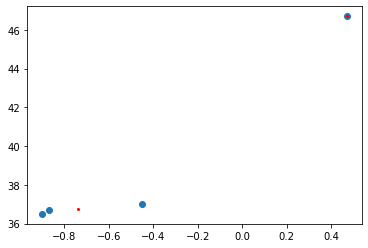

In [43]:
#determine the centroid for each cluster
kmeans = KMeans(n_clusters=2, init='k-means++', max_iter=len(loc_compact), n_init=10, random_state=0)
pred_y = kmeans.fit_predict(loc_compact)
plt.scatter(loc_compact[:,0], loc_compact[:,1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=len(loc_compact), c='red')
plt.show()

In [44]:
# get the centroids
centroids = kmeans.cluster_centers_
centroids

array([[-0.74      , 36.73333333],
       [ 0.47      , 46.7       ]])

In [45]:
#pick the largest cluster using the length of labels
labels =list(kmeans.labels_)
labels

[0, 1, 0, 0]

In [46]:
#get unique elements, and use as classes
classes = list(set(labels))
classes

[0, 1]

In [47]:
#find the largest cluster
unique = Counter(labels)
unique

Counter({0: 3, 1: 1})

In [48]:
bigger_cluster = max(unique, key=unique.get)
bigger_cluster

0

In [49]:
centroids[bigger_cluster]

array([-0.74      , 36.73333333])